In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns


##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)

In [10]:
X_path = p_join('..', 'data_2', 'N2=21_L=1.6_input=2', '2nd_exp_Input.txt')
Y_path_down = p_join('..', 'data_2', 'N2=21_L=1.6_input=2', '2nd_exp_Topology_down.txt')
Y_path_up = p_join('..', 'data_2', 'N2=21_L=1.6_input=2', '2nd_exp_Topology_up.txt')
params_path = p_join('..', 'data_2', 'N2=21_L=1.6_input=2', '2nd_exp_Parameters.txt')


X = pd.read_csv(X_path)
Y_down = pd.read_csv(Y_path_down)
Y_up = pd.read_csv(Y_path_up)
P = pd.read_csv(params_path)

In [17]:
P.head()

,DATA_for_ML_param_1,DATA_for_ML_param_2,DATA_for_ML_param_3,DATA_for_ML_param_4,DATA_for_ML_param_5,DATA_for_ML_param_6
0,1.969128,0.539336,1.766934,-3.151741,0.853436,21
1,0.512427,1.913009,1.977566,-3.109275,0.859320,21
2,1.575511,0.424740,1.706795,-3.157126,0.937495,20
3,1.560052,0.537960,1.956290,-3.086666,0.972263,20
4,0.527655,1.789996,1.885212,-3.003170,0.910765,20


In [11]:
X.head()

,DATA_for_ML_input_1,DATA_for_ML_input_2,DATA_for_ML_input_3,DATA_for_ML_input_4,DATA_for_ML_input_5,DATA_for_ML_input_6,DATA_for_ML_input_7,DATA_for_ML_input_8,DATA_for_ML_input_9,DATA_for_ML_input_10,...,DATA_for_ML_input_12,DATA_for_ML_input_13,DATA_for_ML_input_14,DATA_for_ML_input_15,DATA_for_ML_input_16,DATA_for_ML_input_17,DATA_for_ML_input_18,DATA_for_ML_input_19,DATA_for_ML_input_20,DATA_for_ML_input_21
0,3.096383e-13,5.045476e-11,5.123298e-10,6.391846e-08,3.988294e-07,3.174763e-05,0.000103,0.004434,0.004372,0.085160,...,0.031717,0.393576,0.097227,0.003871,0.000417,0.004682,0.000177,1.004093e-04,1.731991e-06,3.986613e-07
1,9.232781e-14,1.223826e-12,2.022341e-10,1.736205e-09,2.063437e-07,9.974361e-07,0.000067,0.000130,0.003643,0.000497,...,0.080880,0.416490,0.024087,0.002362,0.084450,0.003945,0.003451,6.957455e-05,1.995517e-05,2.865302e-07
2,2.946201e-14,6.572767e-12,8.795593e-11,1.449658e-08,1.163751e-07,1.193038e-05,0.000044,0.002010,0.001761,0.020054,...,0.301675,0.164743,0.018558,0.061177,0.001834,0.000786,0.000011,1.841935e-06,1.649069e-08,-1.000000e+00
3,4.402958e-13,6.044233e-11,8.326478e-10,8.418083e-08,6.892279e-07,4.028392e-05,0.000153,0.004367,0.003821,0.024776,...,0.257109,0.113369,0.024750,0.086397,0.004451,0.001821,0.000040,6.780069e-06,9.702772e-08,-1.000000e+00
4,1.347314e-11,1.677927e-10,2.199694e-08,1.748526e-07,1.526954e-05,6.368056e-05,0.003019,0.004521,0.086773,0.005826,...,0.367225,0.065370,0.005784,0.001386,0.004241,0.000147,0.000060,9.772220e-07,1.709766e-07,-1.000000e+00


In [14]:
Y_down.head(), Y_up.head()

(   Var1
 0     0
 1     1
 2     1
 3     1
 4     0,
    Var1
 0     1
 1     0
 2     1
 3     1
 4     0)

In [25]:
P.shape, Y_down.shape, Y_up.shape, X.shape

((3999, 6), (3999, 1), (3999, 1), (3999, 21))

In [32]:
map_clases_back = {0: '0,0', 1: '0,1', 2: '1,0', 3: '1,1'}
Y = []
for i in range(Y_up.shape[0]):
    if Y_up.values[i] == 0 and Y_down.values[i] == 0:
        Y.append(0)
    elif Y_up.values[i] == 0 and Y_down.values[i] == 1:
        Y.append(1)
    elif Y_up.values[i] == 1 and Y_down.values[i] == 0:
        Y.append(2)
    elif Y_up.values[i] == 1 and Y_down.values[i] == 1:
        Y.append(3)
Y = np.array(Y)

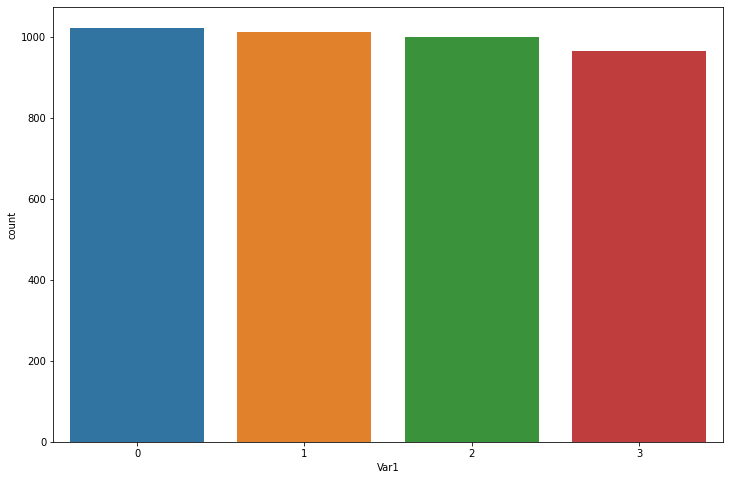

In [43]:
sns.countplot(x="Var1", data=pd.DataFrame(data=Y, columns=['Var1']))
pass

In [49]:
(Y == 0).sum(), (Y == 1).sum(), (Y == 2).sum(), (Y == 3).sum()

(1023, 1012, 999, 965)

### PCA

In [50]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X)

pc_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pc_df['target'] = Y
pc_df.head()

,PC1,PC2,target
0,-0.560433,-0.038710,2
1,-0.550781,-0.032862,1
2,0.501200,-0.115391,3
3,0.503928,-0.098090,3
4,0.549585,0.001246,0


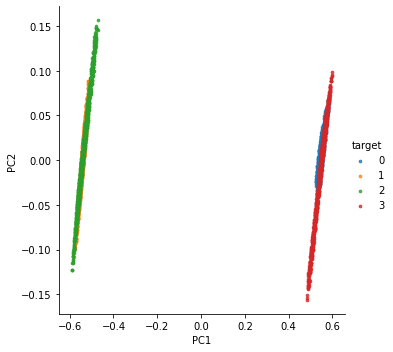

In [51]:
sns.lmplot(x="PC1", y="PC2",
           data=pc_df, 
           fit_reg=False, 
           hue='target', # color by target
           legend=True,
           scatter_kws={"s": 7}) # specify the point size
pass

### TSNE (yet another method for dimensionality reduction)

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=42)
tsne_components = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=tsne_components, columns = ['tsne1', 'tsne2'])
tsne_df['target'] = Y

/home/akhorkin/Repositories/ml_dl_with_topology_data/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/akhorkin/Repositories/ml_dl_with_topology_data/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3999 samples in 0.000s...
[t-SNE] Computed neighbors for 3999 samples in 0.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3999
[t-SNE] Computed conditional probabilities for sample 2000 / 3999
[t-SNE] Computed conditional probabilities for sample 3000 / 3999
[t-SNE] Computed conditional probabilities for sample 3999 / 3999
[t-SNE] Mean sigma: 0.012249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.130527
[t-SNE] KL divergence after 1000 iterations: 0.713962


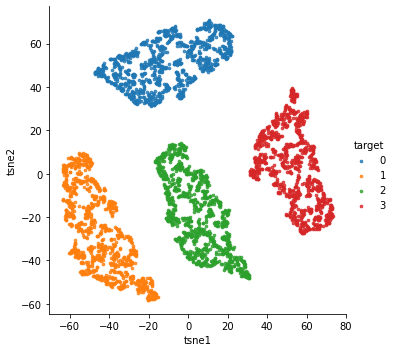

In [53]:
sns.lmplot(x="tsne1", y="tsne2",
           data=tsne_df, 
           fit_reg=False, 
           hue='target', # color by target
           legend=True,
           scatter_kws={"s": 7}) # specify the point size
pass

### Only for central features (16)

In [55]:
def select_n_center_features(data: np.ndarray, n_features: int) -> np.ndarray:
    from copy import deepcopy

    total_components = data.shape[1]
    start = int((total_components - n_features)/2)
    res = deepcopy(data)[:, start: start + n_features]
    print(f'Selected features from indexes:  [{start}, {start + n_features})')
    return res

Selected features from indexes:  [2, 18)


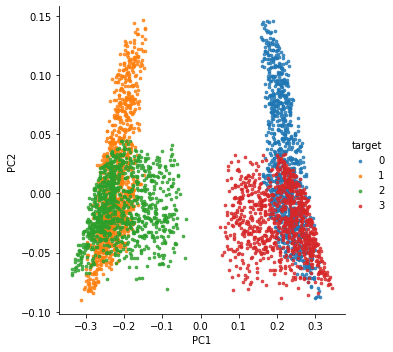

In [57]:
X_16 = select_n_center_features(X.values, 16)
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X_16)

pc_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pc_df['target'] = Y
sns.lmplot(x="PC1", y="PC2",
           data=pc_df, 
           fit_reg=False, 
           hue='target', # color by target
           legend=True,
           scatter_kws={"s": 7}) # specify the point size
pass

/home/akhorkin/Repositories/ml_dl_with_topology_data/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/akhorkin/Repositories/ml_dl_with_topology_data/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3999 samples in 0.000s...
[t-SNE] Computed neighbors for 3999 samples in 0.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3999
[t-SNE] Computed conditional probabilities for sample 2000 / 3999
[t-SNE] Computed conditional probabilities for sample 3000 / 3999
[t-SNE] Computed conditional probabilities for sample 3999 / 3999
[t-SNE] Mean sigma: 0.012249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.121235
[t-SNE] KL divergence after 1000 iterations: 0.712683


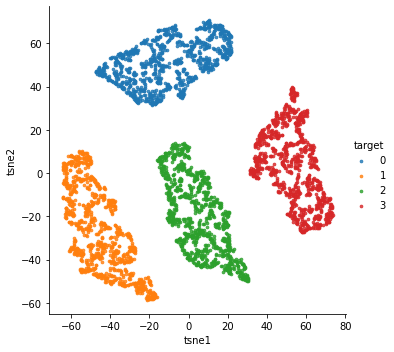

In [58]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
tsne_components = tsne.fit_transform(X_16)

tsne_df = pd.DataFrame(data=tsne_components, columns = ['tsne1', 'tsne2'])
tsne_df['target'] = Y
sns.lmplot(x="tsne1", y="tsne2",
           data=tsne_df, 
           fit_reg=False, 
           hue='target', # color by target
           legend=True,
           scatter_kws={"s": 7}) # specify the point size
pass